In [1]:
import numpy as np
from keras.models import Model
from keras.layers import Dense , Activation, Input, concatenate
from keras import optimizers
from keras import callbacks

# 資料整理
data_restore = np.load('BikeSharingData/day.npy')
tr = data_restore [0:-100 ,:]
ts = data_restore [-100:,:]
mean = np.mean(tr , axis=0)
stdv = np.std(tr , axis=0)
tr = (tr - mean) / stdv
ts = (ts - mean) / stdv
x1_train, x2_train, y_train = tr[:, 0:7], tr[:, 7:11], tr[:, -1:]
x1_test , x2_test, y_test = ts[:,0:7 ,], ts[:, 7:11], ts[:, -1:]

# 模型設計
x1 = Input(shape=[7])
x2 = Input(shape=[4])
h1 = Dense(8 , activation ='sigmoid')(x1)
h2 = Dense(8 , activation ='sigmoid')(x2)
merge = concatenate([h1, h2])
h3 = Dense(16, activation = 'sigmoid')(merge)
y = Dense(1)(h3)
model = Model(inputs=[x1, x2], outputs=[y])
model.summary()

# 指定減損函數，參數訓練方法
drate = 4.0/ x1_train.shape[0]
sgd = optimizers.SGD(lr=0.2, decay =drate , momentum =0.9)
model.compile( optimizer=sgd , loss='mean_squared_error')
# 保存架構
with open('fAPI.json', 'w') as fout:
    fout.write(model.to_json())
# 保存參數
saver = callbacks.ModelCheckpoint('Model/fAPI_bike.epoch_{epoch:02d}.hdf5')
model.fit([x1_train, x2_train] , [y_train] , epochs =15 , batch_size =4, callbacks=[saver])

Using TensorFlow backend.


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 7)             0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 4)             0                                            
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 8)             64          input_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 8)             40          input_2[0][0]                    
___________________________________________________________________________________________

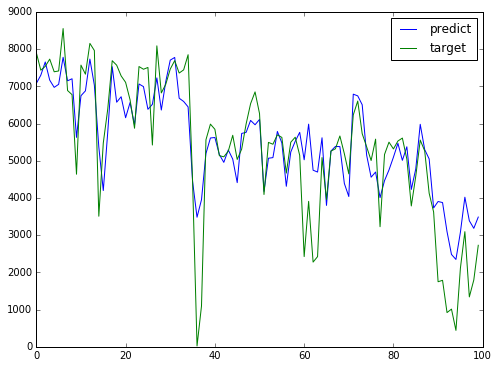

In [2]:
# 輸入測試資料
y_pred = model.predict([x1_test, x2_test])
cnt_pred = y_pred * stdv[-1] + mean[-1]
cnt_true = y_test * stdv[-1] + mean[-1]

# 繪圖
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,6]
day = range(100)
plt.plot(day , cnt_pred , label='predict')
plt.hold(True)
plt.plot(day , cnt_true , label='target')
plt.legend()
plt.show()